# WHAT IS IMAGE RECOGNITION

In [4]:

# Import libraries for use
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.utils import plot_model
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)
     

2.20.0
3.12.0


In [6]:
!jupyter nbconvert --to html "/content/drive/MyDrive/SIT744 - Deep Learning/Assignment/300054233_assignment1_solution.ipynb"
     

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/SIT744 - Deep Learning/Assignment/300054233_assignment1_solution.ipynb' matched no files


In [7]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# Print shape of training and test data
print(f"Shape of training images: {train_images.shape} ")
print(f"Shape of training labels: {train_labels.shape} ")
print(f"Shape of test images: {test_images.shape} ")
print(f"Shape of test labels: {test_labels.shape} ")

Shape of training images: (60000, 28, 28) 
Shape of training labels: (60000,) 
Shape of test images: (10000, 28, 28) 
Shape of test labels: (10000,) 


In [9]:
# # Print size of training and test data
print(f"Size of training images: {train_images.nbytes / (1024 * 1024)} MB")
print(f"Size of training labels: {train_labels.nbytes / (1024 * 1024)} MB")
print(f"Size of test images: {test_images.nbytes / (1024 * 1024)} MB")
print(f"Size of test labels: {test_labels.nbytes / (1024 * 1024)} MB")
     

Size of training images: 44.86083984375 MB
Size of training labels: 0.057220458984375 MB
Size of test images: 7.476806640625 MB
Size of test labels: 0.0095367431640625 MB


In [10]:
# Create a list of class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# View the content of classes
classes
     


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

[]

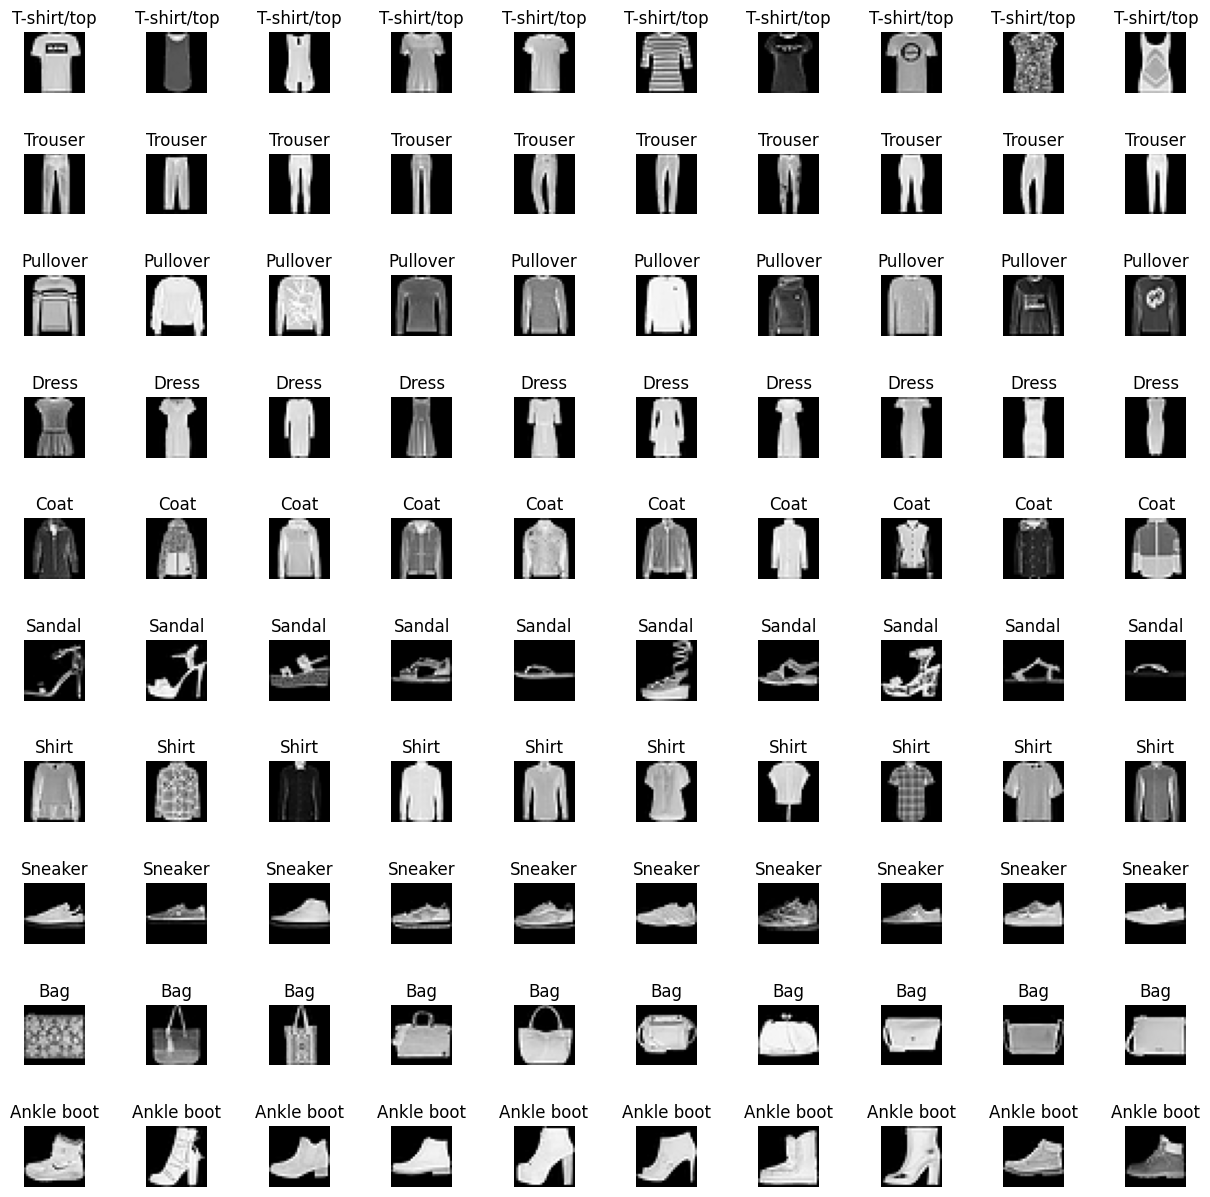

In [11]:
# Create a figure with 10 subplots (one for each class)
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
fig.subplots_adjust(hspace=1.0, wspace=1.0)

# Loop through each class. Select 10 images of each class to display
for i in range(len(classes)):
    # Select images with the current class label
    images = train_images[train_labels == i]
    # Loop through each image and display
    for j in range(10):
        # Set the current subplot
        ax[i,j].imshow(images[j], cmap='gray')
        ax[i,j].set_title(classes[i])
        ax[i,j].axis('off')

# Show the plot and save the plot image
plt.plot()
# plt.savefig('300054233-assignment1-fashion-mnist-10-classes.png', bbox_inches='tight')

In [12]:
# Print the shape of a training image
train_images[0].shape

(28, 28)

In [13]:
# Print the matrix of a training image
train_images[0]
     

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
# Reshape training images and test images into 1D
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
     

In [15]:
# Normalise training images and test images to float32 datatype
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
     

In [16]:
# Encode trainning labels and test labels using one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
     

In [17]:
# Print a vector of training label
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# Setting up model for training

In [18]:
# Create model with 3 dense layers
neuralNetwork = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28, )),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Plot the shape of the model
plot_model(neuralNetwork, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [21]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Plot the shape of the model
plot_model(neuralNetwork, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# Fitting The Model

In [24]:
# Setup optimizer, loss function and metrics for the model
neuralNetwork.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

In [25]:
# Create model training log for TensorBoard
!rm -rf ./logs/

from datetime import datetime
import os

root_logdir = "logs"
run_id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(root_logdir, run_id)

callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir=logdir,
        histogram_freq=1
    )
]

In [26]:
# save the initial weights for later use
init_weights = neuralNetwork.get_weights()
     

In [27]:
# Model fitting
history = neuralNetwork.fit(train_images,
                            train_labels,
                            epochs=20,
                            batch_size=128,
                            validation_data=(test_images, test_labels),
                            callbacks=callbacks)

# Evaluate the model by test dataset
test_loss, test_acc = neuralNetwork.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8203 - loss: 0.5169 - val_accuracy: 0.8501 - val_loss: 0.4304
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8684 - loss: 0.3677 - val_accuracy: 0.8615 - val_loss: 0.3856
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8815 - loss: 0.3256 - val_accuracy: 0.8671 - val_loss: 0.3689
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8894 - loss: 0.3017 - val_accuracy: 0.8737 - val_loss: 0.3536
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8953 - loss: 0.2844 - val_accuracy: 0.8812 - val_loss: 0.3408
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8988 - loss: 0.2718 - val_accuracy: 0.8816 - val_loss: 0.3385
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9053 - loss: 0.2568 - val_accuracy: 0.8842 - val_loss: 0.3285
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9086 - loss: 0.2449 - val_accuracy: 0

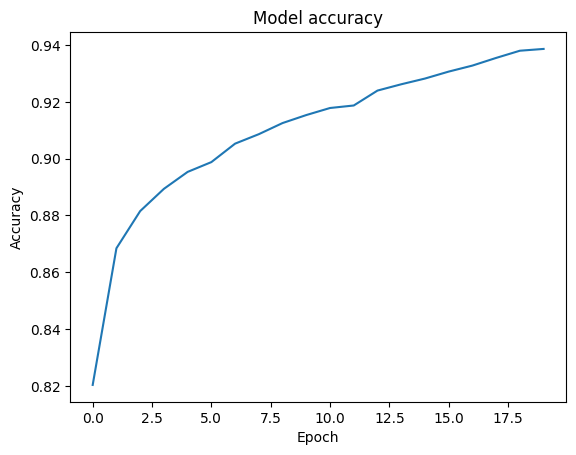

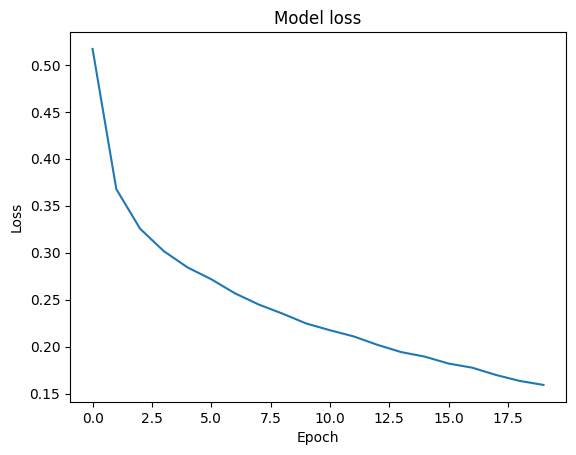

In [28]:
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
     

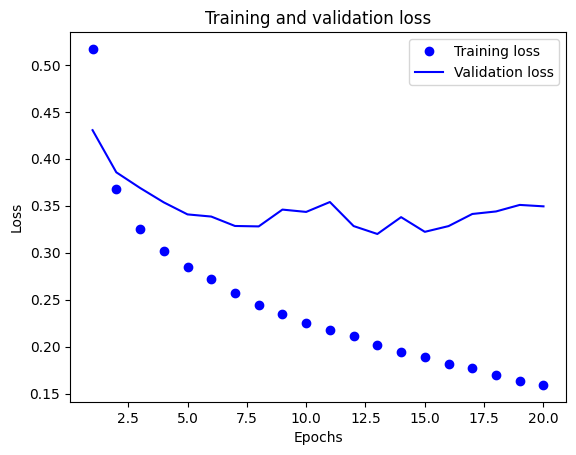

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8913 - loss: 0.3494


[0.3493512272834778, 0.8913000226020813]

In [29]:
# Check the training and validation loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

results = neuralNetwork.evaluate(test_images, test_labels)
results

# Analyse the Model

In [30]:
# Print the model summary
neuralNetwork.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705,440 (2.69 MB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470,294 (1.79 MB)

In [31]:
# Count the number of parameters
num_params = neuralNetwork.count_params()
print('Number of parameters: ', num_params)

Number of parameters:  235146


In [33]:
num_activations = 0

for layer in neuralNetwork.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        num_activations += layer.units

print("Number of activations:", num_activations)


Number of activations: 394


In [35]:
# Print the default initialization method of the dense layer

from tensorflow.keras.layers import Dense


In [36]:
dense_layer = Dense(units=32)
init_method = dense_layer.kernel_initializer

print(init_method)


In [37]:
init_method = dense_layer.kernel_initializer

print(init_method)

In [38]:
# Shape of the matrix of initial weights
init_weights[0].shape

(784, 256)

<Axes: >

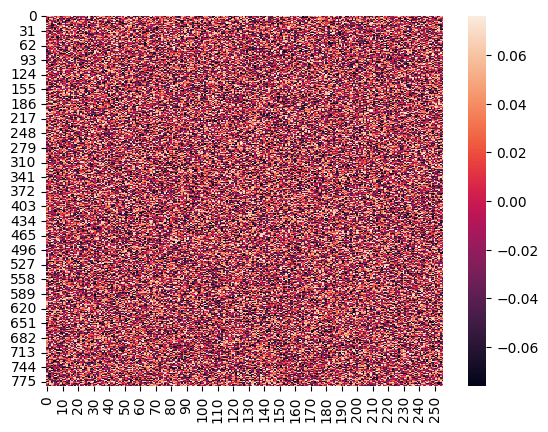

In [39]:

import seaborn as sns

# Get the initial weights of the model
matrix = init_weights[0]

# Plot the heatmap
sns.heatmap(matrix)

<Axes: >

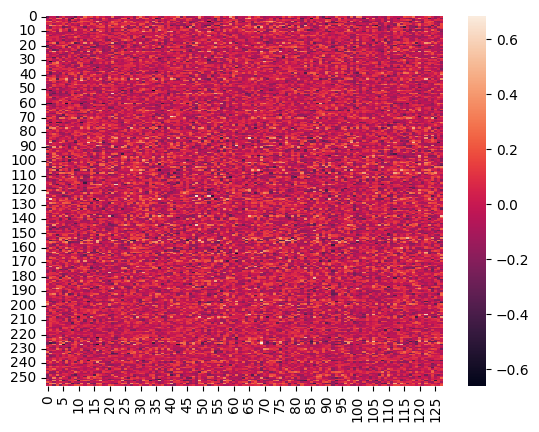

In [40]:
# Get the weights of the second layer after model fitting
weights = neuralNetwork.layers[1].get_weights()
matrix = weights[0]

# Plot the heatmap
sns.heatmap(matrix)

In [41]:
# Shape of the matrix of weights in second layer after model fitting
weights[0].shape

(256, 128)

# Use Tenorflow Tools

In [42]:

%reload_ext tensorboard
%tensorboard --logdir=logs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

# Improve the model by adding dropout layers

In [43]:
from keras.layers import Dense, Dropout

# Delete previous model
del neuralNetwork

# Recreate the model by applying dropout regularisation
neuralNetwork = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28, )),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')])

# Setup optimizer, loss function and metrics for the model
neuralNetwork.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

# Plot the model
plot_model(neuralNetwork, show_shapes=True)
     

You must install pydot (`pip install pydot`) for `plot_model` to work.


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Clean up model training log for TensorBoard
!rm -rf ./logs/

# Model fitting
history = neuralNetwork.fit(train_images,
                            train_labels,
                            epochs=20,
                            batch_size=128,
                            validation_data=(test_images, test_labels),
                            callbacks=callbacks)
     

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7314 - loss: 0.7533 - val_accuracy: 0.8290 - val_loss: 0.4630
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8179 - loss: 0.5107 - val_accuracy: 0.8421 - val_loss: 0.4273
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8352 - loss: 0.4619 - val_accuracy: 0.8519 - val_loss: 0.4007
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8444 - loss: 0.4365 - val_accuracy: 0.8610 - val_loss: 0.3881
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8489 - loss: 0.4200 - val_accuracy: 0.8598 - val_loss: 0.3875
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8555 - loss: 0.4022 - val_accuracy: 0.8650 - val_loss: 0.3713
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8581 - loss: 0.3935 - val_accuracy: 0.8698 - val_loss: 0.3696
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8596 - loss: 0.3880 - val_accuracy: 0.

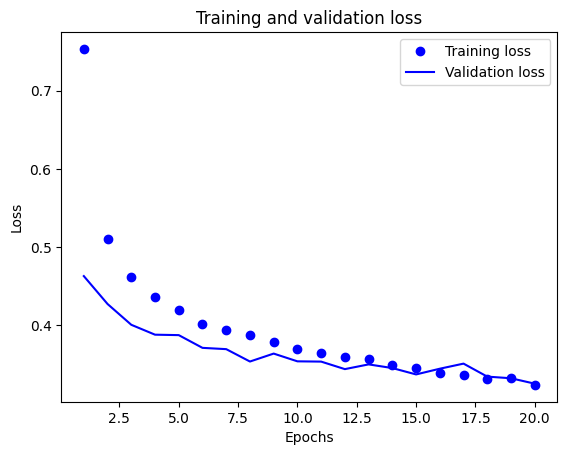

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8828 - loss: 0.3255


[0.32548385858535767, 0.8827999830245972]

In [45]:
# Check the training and validation loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

results = neuralNetwork.evaluate(test_images, test_labels)

results
     